# 5003 HW2

## ZHANG Juntao - 20908272

### 1. Problem A

Some packages required

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import integrate
from scipy.stats import norm

#### Simulate a trajectory of Random Walk

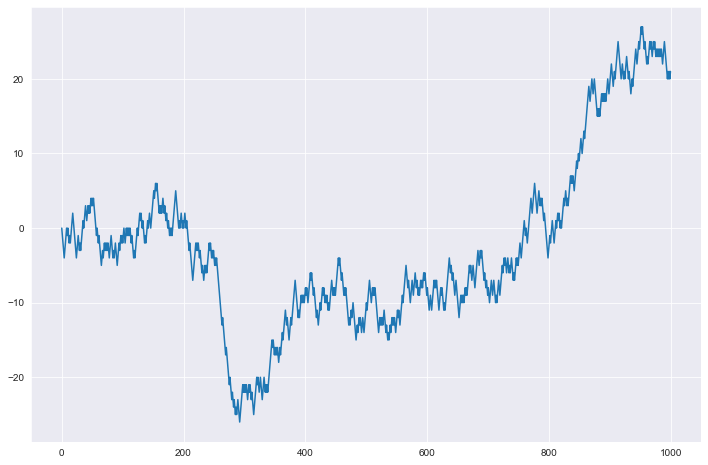

In [84]:
np.random.seed(777)

def random_walk(length):
    points =[]
    points.append(0)
    for i in range (1, length):
        step = 2 * np.random.binomial(1,0.5,1) - 1
        next_point = float(points[i-1] + step)
        points.append(next_point)
    return points

plt.figure(figsize = (12,8))

for i in range(1):
    walk=random_walk(1000)
    plt.plot(walk)
 
plt.grid(True)
plt.show()

#### 1.1 Brownian particle trajectory

Since $U(x)=0$, the particle performs Brownian motion, so can simulate its trajectory based on Random walk.

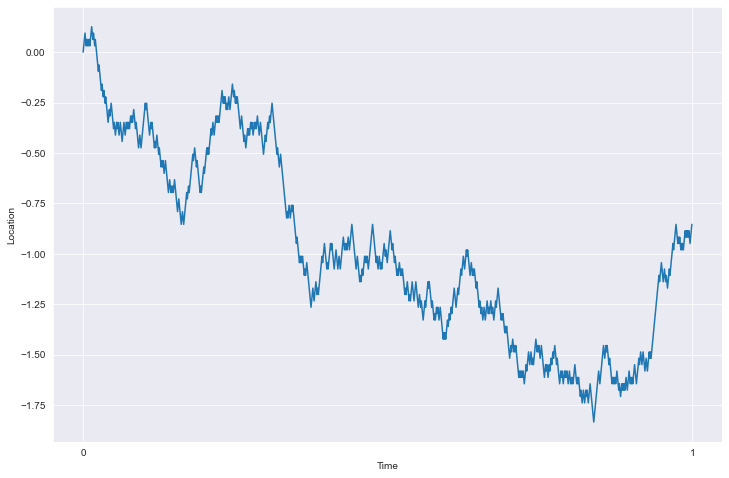

In [85]:
np.random.seed(77)

plt.figure(figsize = (12,8))

def Brownian(cut):
    points =[]
    points.append(float(0))
    for i in range (1, cut):
        step = (2 * np.random.binomial(1,0.5,1) - 1)/math.sqrt(cut)
        next_point = float(points[i-1] + step)
        points.append(next_point)
    return points
    
for i in range(0,1):
    walk = Brownian(1000)
    plt.plot(walk)
    
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Location')
plt.xticks(range(0,1001,1000),{"0","1"})
plt.show()

#### 1.2 Compute MSD:$\left\langle[x(t)-x(0)]^2\right\rangle$

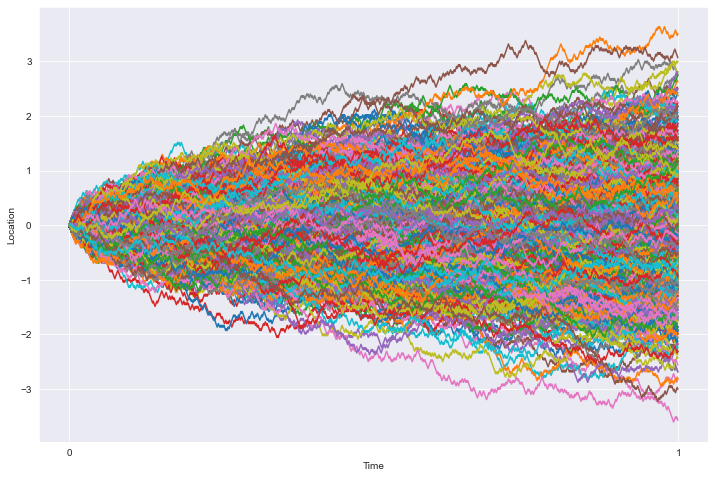

In [86]:
np.random.seed(7)

plt.figure(figsize = (12,8))

for i in range(0,1000):
    walk = Brownian(1000)
    plt.plot(walk)
    
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Location')
plt.xticks(range(0,1001,1000),{"0","1"})
plt.show()

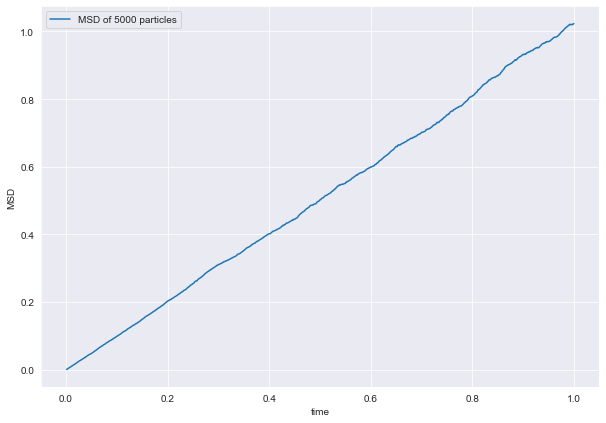

In [87]:
np.random.seed(777)

plt.figure(figsize = (10,7))

n_particle = 5000
cut = 1000
particles = [[] for _ in range(n_particle)]
for i in range(0, n_particle):
    particles[i] = Brownian(cut)
MSD = []
t = [i/cut for i in range(1,cut+1)]
for j in range(cut):
    ss = 0
    for k in range(n_particle):
        ss += particles[k][j]**2/n_particle
    MSD.append(ss)

plt.plot(t, MSD, label = 'MSD of 5000 particles')
plt.xlabel('time')
plt.ylabel('MSD')
plt.legend()
plt.grid(True)     
plt.show()

We use 5000 particles and divide one second into 1000 points, as we can see from the above figure, $\left\langle[x(t)-x(0)]^2\right\rangle$ is linear with time.
And the theoretical value of diffusivity is $D$ = $k_{b}T / \gamma$, so from the known information in this problem, we can get that it is equal to 1. 

In [88]:
MSD[-1]/1.

1.023441599999994

The numerical value of diffusivity is $\hat{D}$ = $\left\langle[x(t)-x(0)]^2\right\rangle$ / $t$.

In our simulation, we can determine it with setting t = 1, and get the value of it is 1.023441599999994

So we can find that the numerical value $\hat{D}$ is very close to the theoretical value D.

### 2. Problem B

Set the starting position $X(0)=0$

Then solve the equation of $X(t)$, we can get that: $X(t)=e^{-t} \int_0^t e^\tau \xi(\tau) d \tau$ 

So we choose time equal to 1000, and simulate 7000 particles' trajectories, to find the stationary PDF from long-time  behaviour of particle trajectory.

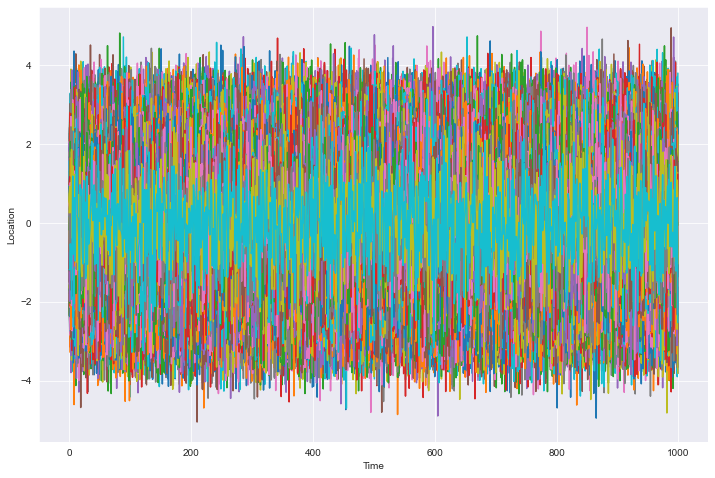

In [89]:
np.random.seed(777)

t = 1000
n_particle = 7000
par = [[0]*t for _ in range(n_particle)]
for i in range(n_particle):
    for j in range(t):
        w = np.random.normal(0,1,1)
        par[i][j] = (1 - np.exp(-j-1)) * w
        
plt.figure(figsize = (12,8))

for b in range(n_particle):
    plt.plot(par[b])
    
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Location')
plt.show()

/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


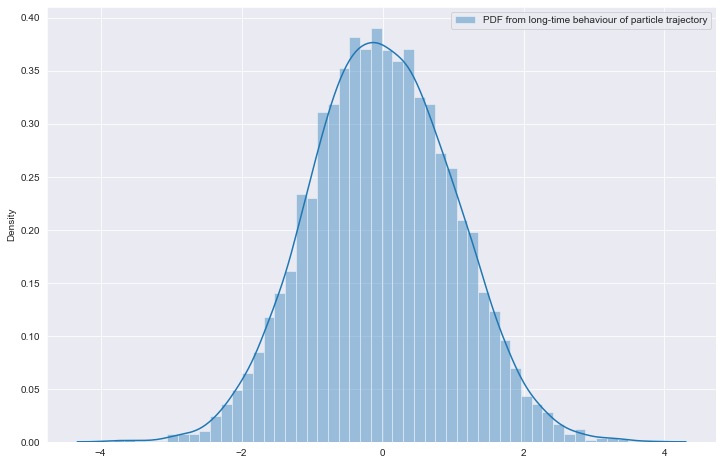

In [90]:
plt.figure(figsize = (12,8))

final = []
for g in range(n_particle):
    final.append(par[g][t-1])
    
sns.set_style('darkgrid')
sns.distplot(final, label='PDF from long-time behaviour of particle trajectory')

# Z_step = np.arange(-5, 6, 0.001)
# Z_theoretical = norm.pdf(Z_step, loc=0, scale=np.sqrt(1))
# plt.plot(Z_step,Z_theoretical, color='r', label='Theoretical PDF of N(0, 1)')
plt.legend()

In [91]:
np.var(final)

1.0186120976279076

#### Conclusion

As we can we from the above figures, the numerical PDF is very close to a normal distribution. It shows that the confinement  potential $U(X)$ limits the range of motion of particles, so in long-term time, the position of the particle will fall within the restricted interval.

Besides, the value of the variance of $X(t)$ is 1.0186120976279076